# **Chapter 9**
## *Exploratory Data Analysis and Diagnosis*, 

This chapter dives into visualization techniques for effective Exploratory Data Analysis (EDA) with interactive visualizations. You will learn how to investigate and diagnose your time series data to test for specific assumptions such as stationarity and autocorrelation. Finally, the chapter covers practical recipes for transforming your time series data using a family of power transforms, decomposition, and differencing methods.

Additionally, how decompose a time series into its components (trend, seasonality, and residuals), test for different assumptions that your models may rely on (such as stationarity, normality, and homoskedasticity), and explore techniques to transform the data to satisfy some of these assumptions.  

The recipes that you will encounter in this chapter are as follows:  
* Plotting time series data using pandas
* Plotting time series data with interactive visualizations using hvPlot
* Decomposing time series data
* Detecting time series stationarity
* Applying power transformations
* Testing for autocorrelation in time series data

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from statsmodels.datasets import co2, get_rdataset

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=16)               ## 
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ## 
#############################################

#### closing_price

In [6]:
file = ('https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/refs/heads/main/datasets/Ch9/closing_price.csv')

closing_price = pd.read_csv(file, 
                            index_col='Date',
                            parse_dates=True)

closing_price.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,62.830273,140.552994,115.847458
2019-11-04,63.242901,141.364731,117.676682
2019-11-05,63.152027,141.276733,117.864746
2019-11-06,63.179031,140.885513,118.625488
2019-11-07,63.908203,141.081116,119.083855


#### CO2

In [8]:
co2_df = co2.load_pandas().data
co2_df

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [9]:
co2_df.isna().sum()

co2    59
dtype: int64

In [10]:
co2_df = co2_df.ffill()

co2_df.isna().sum()

co2    0
dtype: int64

#### air_passengers

In [12]:
# Load the 'AirPassengers' dataset from R's built-in datasets
air_passengers = get_rdataset("AirPassengers")  

# Extract the dataset as a DataFrame
airp_df = air_passengers.data  

# Display the DataFrame
airp_df  

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [13]:
# Set the index to a monthly date range starting from 1949 to 1961
airp_df.index = pd.date_range('1949', '1961', freq='M')  

# Drop the 'time' column as it's no longer needed
airp_df.drop(columns=['time'], inplace=True)  

# Reset index and rename columns for better readability
airp_df_cleaned = airp_df.reset_index().rename(columns={'value': 'passengers', 'index': 'date'})  

# Save the cleaned DataFrame as a CSV file for future use
airp_df_cleaned.to_csv('data/air_passenger.csv', index=False)  

# Recipe 1. Plotting Time Series Data using pandas

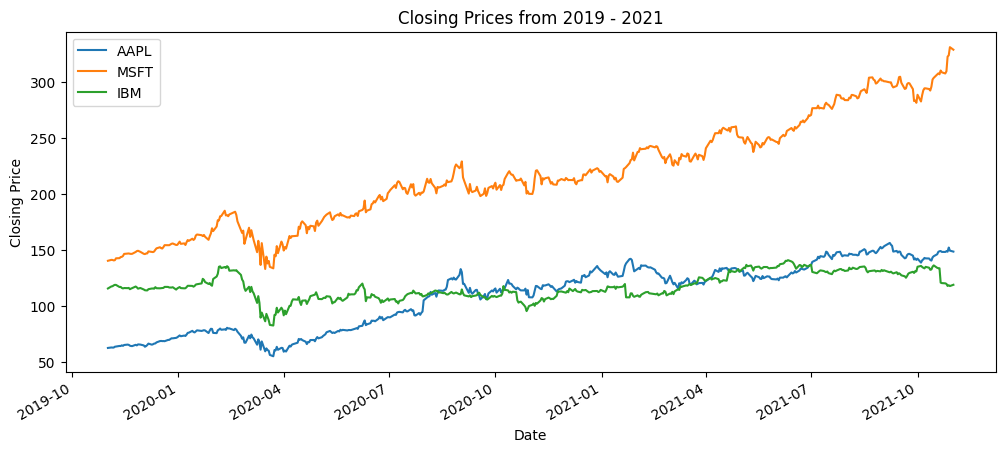

In [15]:
start_date = '2019'
end_date = '2021'

plot = closing_price.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Closing Price')

# plt.savefig('images/fig_9.1.png', bbox_inches='tight')

If you want to see how the prices fluctuate (up or down) in comparison
to each other, one easy approach is to normalize the data. To accomplish
this, just divide the stock prices by the first-day price (first row) for each
stock. This will make all the stocks have the same starting point:

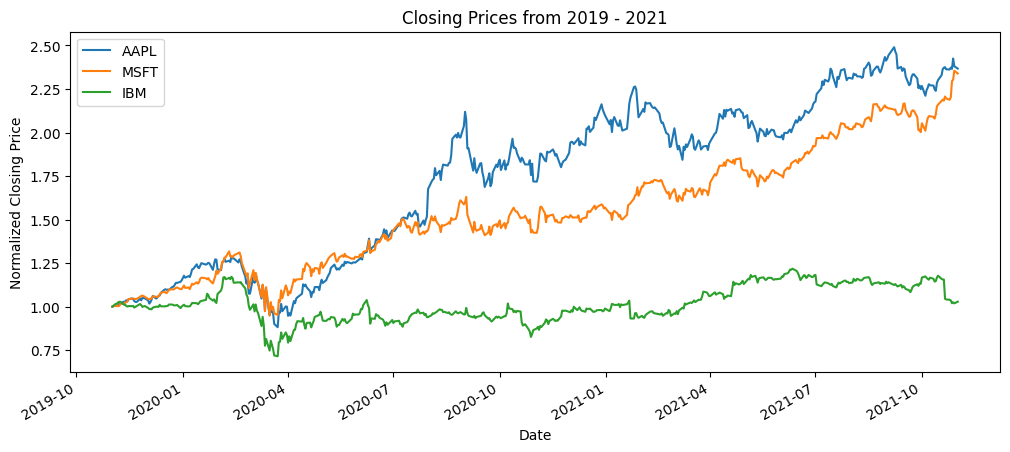

In [17]:
# Normalize the closing price by dividing each value by the first value in the series
closing_price_n = closing_price.div(closing_price.iloc[0])  

plot = closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price')


In [18]:
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


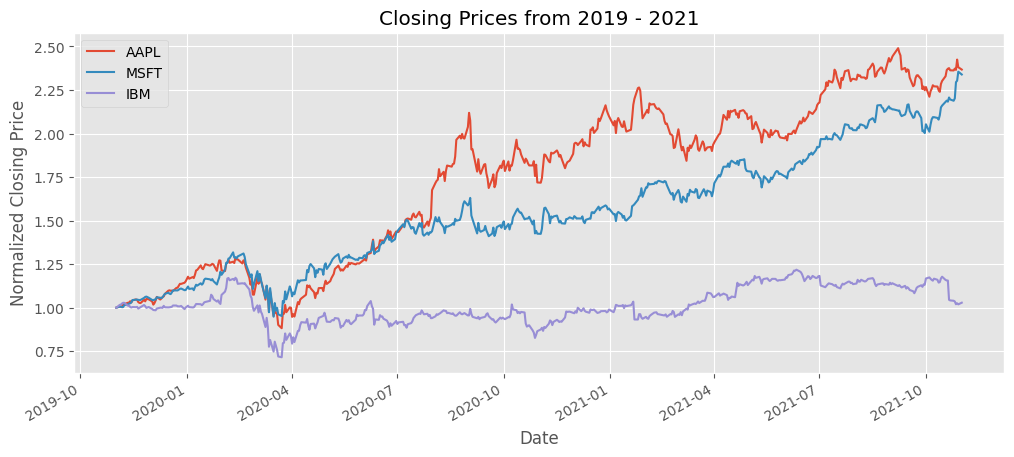

In [19]:
plt.style.use('ggplot')

plot = closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price')

In [20]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


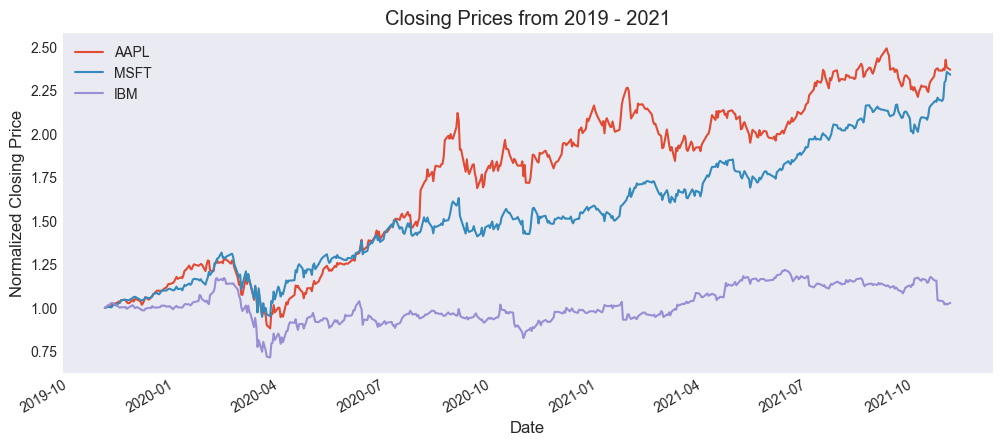

In [21]:
plt.style.use('seaborn-v0_8-dark')

plot = closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price')

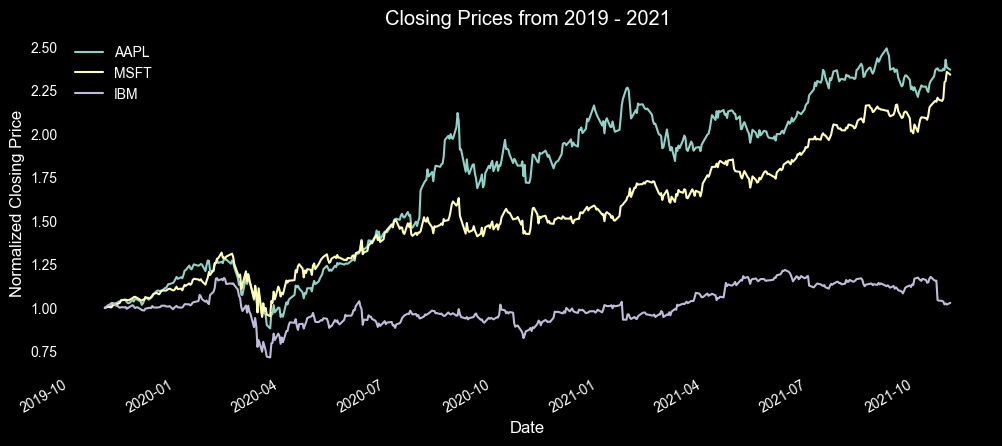

In [22]:
plt.style.use("dark_background")
plot = closing_price_n.plot(
            title=f'Closing Prices from {start_date} - {end_date}',
            ylabel= 'Normalized Closing Price')

In [23]:
# Back to standard Style
plt.style.use("default") 

# Define Size for all graphs
plt.rcParams["figure.figsize"] = [12, 5]

# Magic Command
%matplotlib inline

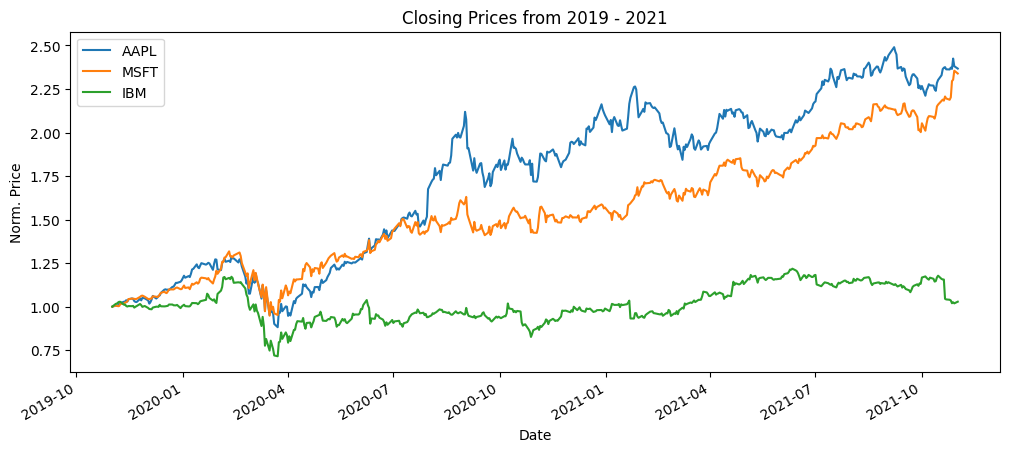

In [24]:
plot = closing_price_n.plot(                                         # Plot the normalized closing prices
            title=f'Closing Prices from {start_date} - {end_date}',  # Set plot title dynamically
            ylabel='Norm. Price');                                   # Label for the y-axis

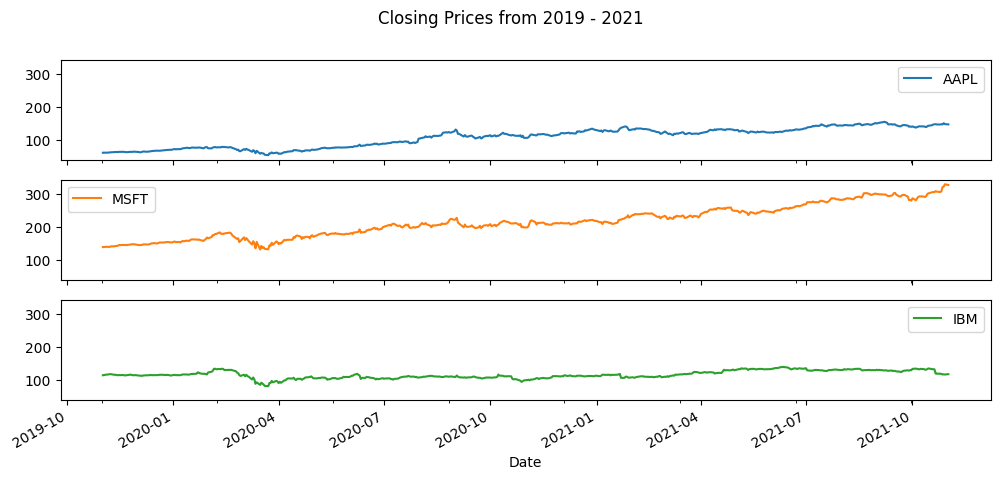

In [25]:
plot = closing_price.plot(      # Plot the closing prices with multiple subplots
            subplots=True,      # Create separate subplots for each column
            sharey=True,        # Share the y-axis scale across subplots
            sharex=True,        # Share the x-axis scale across subplots
            title=f'Closing Prices from {start_date} - {end_date}');  # Set dynamic title

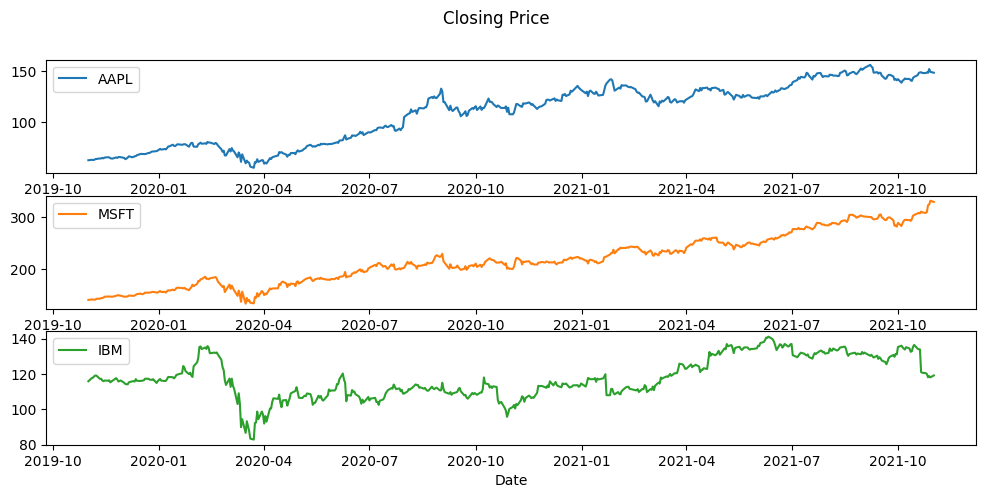

In [26]:
# Plot closing prices with separate y-axes for each subplot
plot = closing_price.plot(
            subplots=True,           # Create separate subplots for each column
            sharey=False,            # Do not share the y-axis scale (each subplot has its own scale)
            sharex=False,            # Do not share the x-axis scale (each subplot has its own scale)
            title='Closing Price');  # Set title for the figure

# Recipe 2. Plotting Time Series with Interactive Visualization using hvplot and Plotly Express

In [28]:
import hvplot.pandas 
import hvplot as hv

In [29]:
# Normalize closing prices by dividing each value by the first row's value
closing_price_n = closing_price.div(closing_price.iloc[0])  

# Display the first five rows of the normalized closing prices
closing_price_n.head()

,AAPL,MSFT,IBM
Date,,,
2019-11-01,1.000000,1.000000,1.000000
2019-11-04,1.006567,1.005775,1.015790
2019-11-05,1.005121,1.005149,1.017413
2019-11-06,1.005551,1.002366,1.023980
2019-11-07,1.017156,1.003757,1.027937


In [30]:
plot = closing_price_n.hvplot(
    title=f'Closing Prices from {start_date} - {end_date}',
    width=1000,  # Set the width of the plot
    height=600   # Set the height of the plot
)
plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [31]:
closing_price_n.plot(backend='hvplot', 
                     title=f'Closing Prices from {start_date} - {end_date}',
                     width=1000,  # Set the width of the plot
                     height=600)   # Set the height of the plot)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [32]:
plot = closing_price_n.plot(backend='hvplot', 
                     title=f'Closing Prices from {start_date} - {end_date}',
                     width=1000,  # Set the width of the plot
                     height=600)  # Set the height of the plot
plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [33]:
plot = closing_price.hvplot(width=300, subplots=True)
plot

:NdLayout   [Variable]
   :Curve   [Date]   (value)

In [34]:
closing_price.hvplot(width=300, subplots=True).cols(2)

:NdLayout   [Variable]
   :Curve   [Date]   (value)

### There is more

In [36]:
closing_price['AAPL'].hvplot.line(by=['index.year'])

:NdOverlay   [index.year]
   :Curve   [Date]   (AAPL)

In [37]:
(closing_price_n['AAPL'].hvplot(width=800, height=500) + 
 closing_price_n['MSFT'].hvplot(width=800, height=500))

:Layout
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

In [38]:
(closing_price_n['AAPL'].hvplot(width=800, height=500) * 
 closing_price_n['MSFT'].hvplot())

:Overlay
   .Curve.AAPL :Curve   [Date]   (AAPL)
   .Curve.MSFT :Curve   [Date]   (MSFT)

In [39]:
(closing_price['AAPL'].hvplot(width=400) + closing_price['MSFT'].hvplot(width=400)) * closing_price['IBM'].hvplot()

:Layout
   .Overlay.I  :Overlay
      .Curve.AAPL :Curve   [Date]   (AAPL)
      .Curve.IBM  :Curve   [Date]   (IBM)
   .Overlay.II :Overlay
      .Curve.MSFT :Curve   [Date]   (MSFT)
      .Curve.IBM  :Curve   [Date]   (IBM)

In [40]:
import seaborn as sns

In [41]:
melted_cp = closing_price_n.copy().reset_index().melt(id_vars=['Date'], value_vars=closing_price_n.columns.tolist())
melted_cp.head()

,Date,variable,value
0,2019-11-01,AAPL,1.000000
1,2019-11-04,AAPL,1.006567
2,2019-11-05,AAPL,1.005121
3,2019-11-06,AAPL,1.005551
4,2019-11-07,AAPL,1.017156


In [42]:
closing_price.columns.names = ['Symbols']

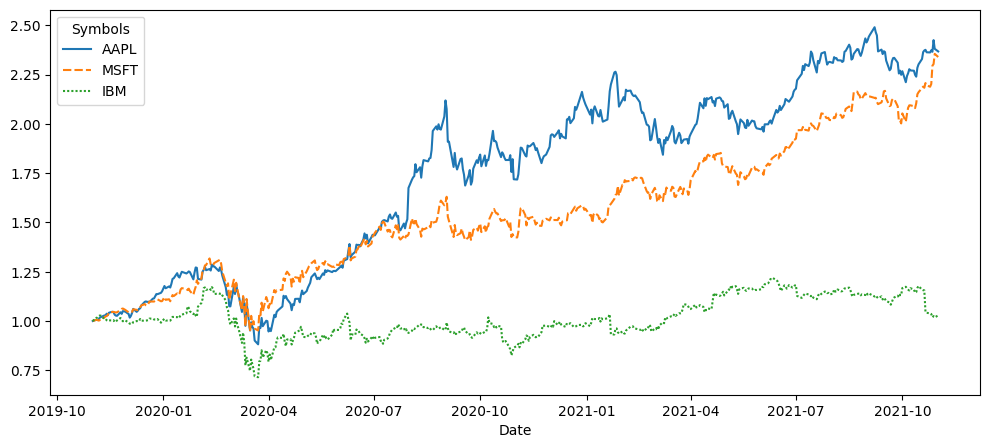

In [43]:
fig, ax = plt.subplots()
sns.lineplot(data=closing_price_n);

# Recipe 3. Decomposing Time Series

In [45]:
import pandas as pd
import statsmodels as sm
from statsmodels.datasets import elec_equip, co2
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

In [46]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ##
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=16)               ## 
# plt.rc('axes', labelsize=14)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=12)             ## 
#############################################

### Plot the datasets

In [48]:
co2_df

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [49]:
co2_df.shape

(2284, 1)

In [50]:
co2_df.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

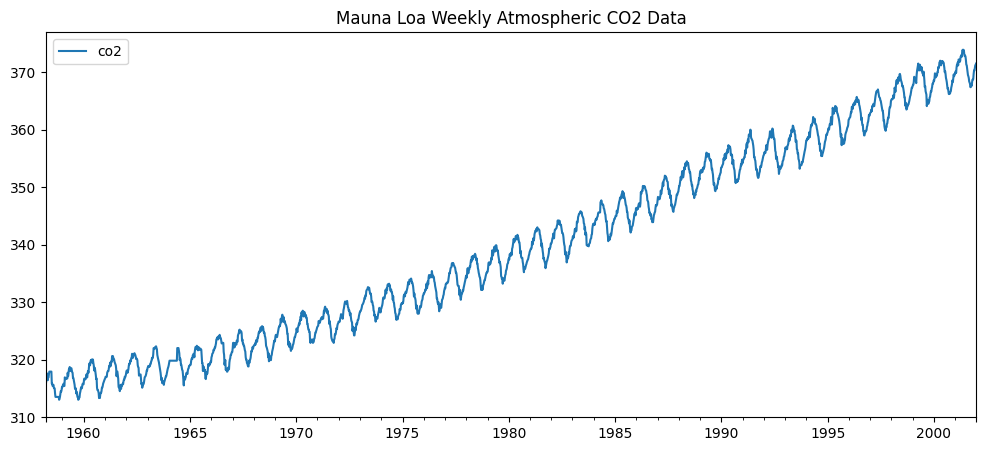

In [51]:
plpt = co2_df.plot(title=co2.TITLE)

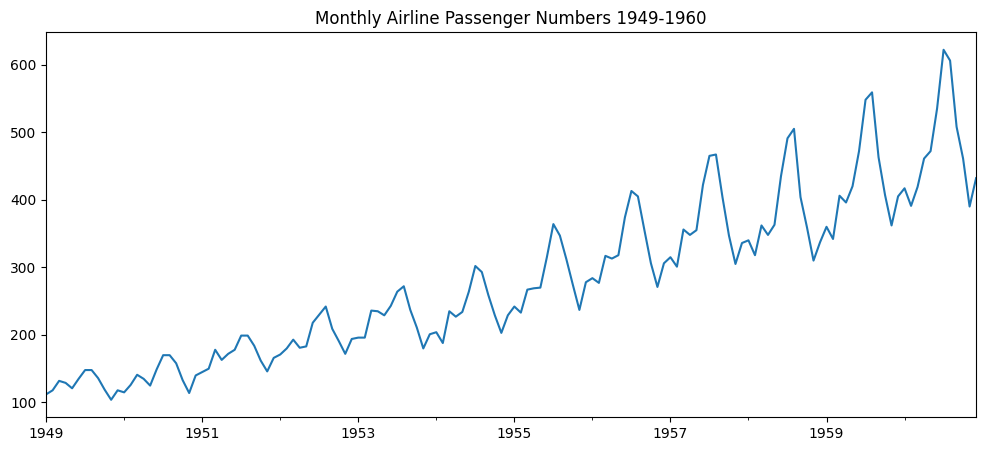

In [52]:
plot = airp_df['value'].plot(title=air_passengers['title'])

In [53]:
#plt.rcParams["figure.figsize"] = (11,6)
co2_decomposed = seasonal_decompose(co2_df,model='additive')
air_decomposed = seasonal_decompose(airp_df,model='multiplicative')

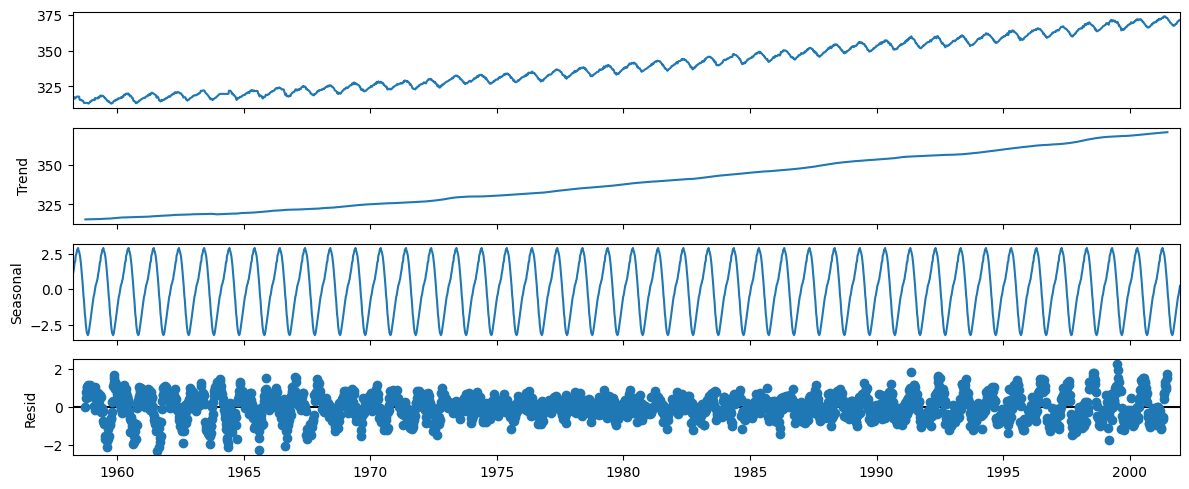

In [54]:
plot = co2_decomposed.plot()

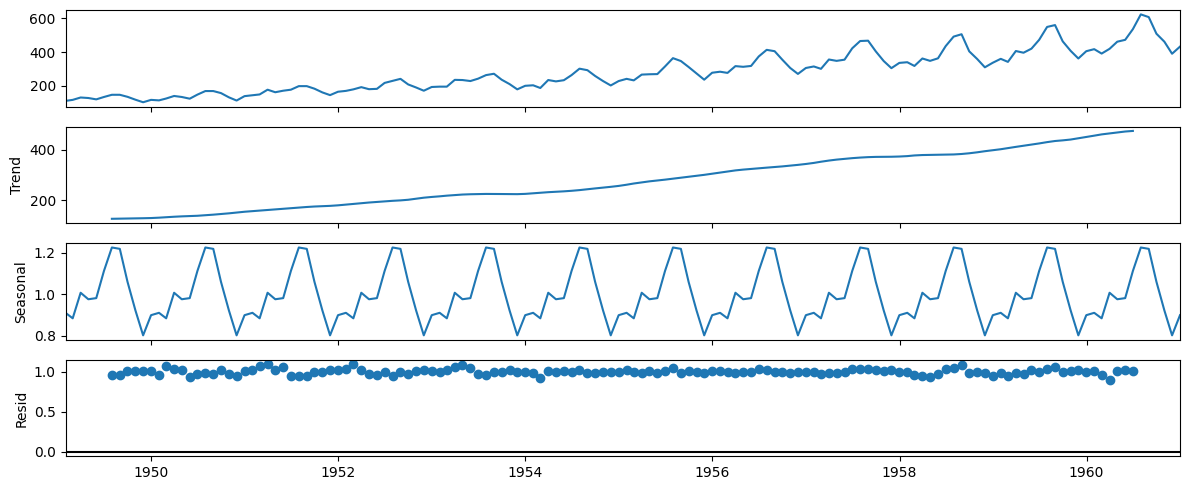

In [55]:
plot = air_decomposed.plot()

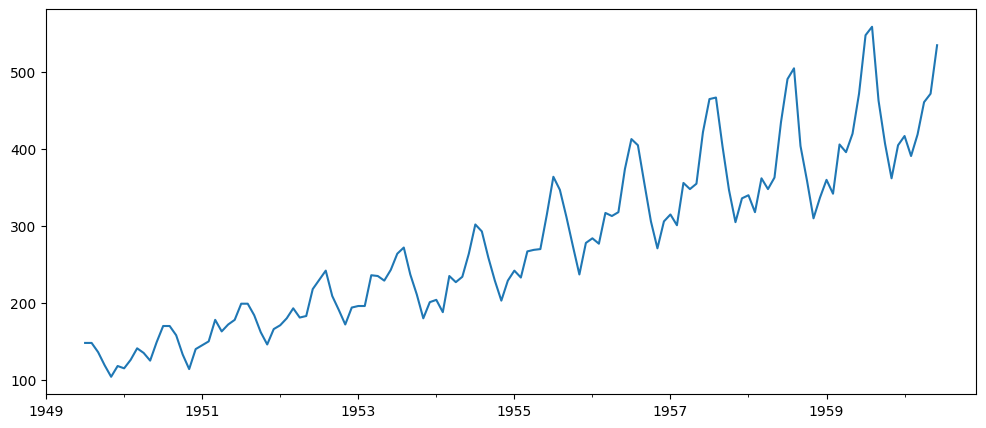

In [56]:
plot = (air_decomposed.trend * 
     air_decomposed.seasonal * 
     air_decomposed.resid).plot()

In [57]:
co2_stl = STL(  
    co2_df,      # Apply Seasonal-Trend Decomposition using LOESS (STL) to the CO2 data  
    seasonal=13, # Set seasonal period to 13 (assumes monthly data with a yearly cycle)  
    robust=True  # Use a robust method to reduce the influence of outliers  
).fit()          # Fit the decomposition model  

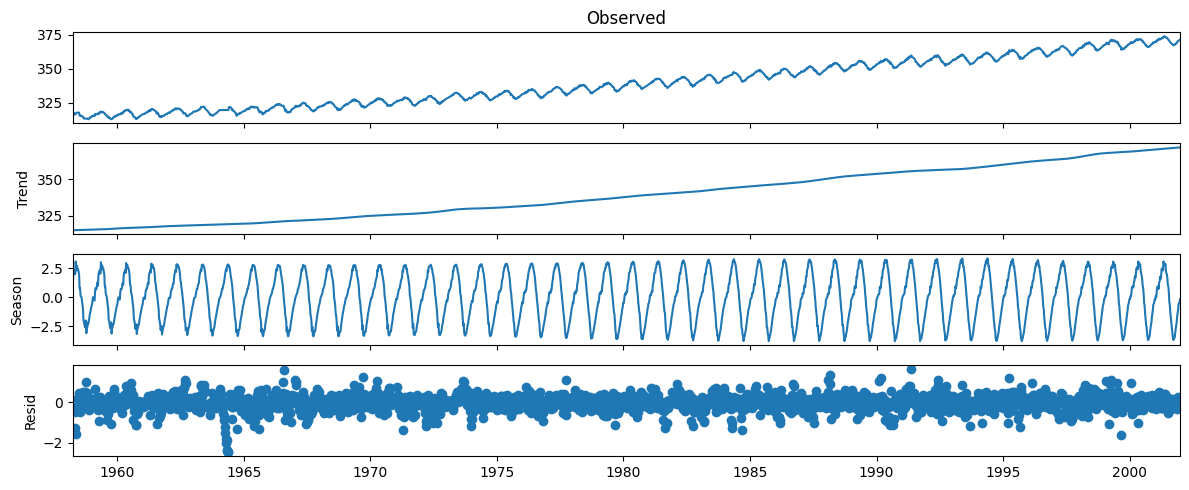

In [58]:
plot = co2_stl.plot()

### Hodrick-Prescott filter
The **Hodrick-Prescott filter** is a smoothing filter that can be used to
separate short-term fluctuations (cyclic variations) from long-term trends.
This is implemented a`s hp_filt`er in the statsmodels library.

In [60]:
# plt.rcParams["figure.figsize"] = (20,3)
from statsmodels.tsa.filters.hp_filter import hpfilter

In [61]:
co2_df

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [62]:
# Apply the Hodrick-Prescott filter to the CO2 dataset to separate trend and cycle components
hpfilter(co2_df)

(1958-03-29   -1.559479
 1958-04-05   -0.285928
 1958-04-12    0.088597
 1958-04-19    0.065250
 1958-04-26   -0.954871
                 ...   
 2001-12-01    0.619135
 2001-12-08    0.969594
 2001-12-15    1.215590
 2001-12-22    1.159358
 2001-12-29    1.202375
 Freq: W-SAT, Name: cycle, Length: 2284, dtype: float64,
 1958-03-29    317.659479
 1958-04-05    317.585928
 1958-04-12    317.511403
 1958-04-19    317.434750
 1958-04-26    317.354871
                  ...    
 2001-12-01    369.680865
 2001-12-08    369.830406
 2001-12-15    369.984410
 2001-12-22    370.140642
 2001-12-29    370.297625
 Freq: W-SAT, Name: trend, Length: 2284, dtype: float64)

In [63]:
co2_cyclic, co2_trend = hpfilter(co2_df)

In [64]:
co2_cyclic

1958-03-29   -1.559479
1958-04-05   -0.285928
1958-04-12    0.088597
1958-04-19    0.065250
1958-04-26   -0.954871
                ...   
2001-12-01    0.619135
2001-12-08    0.969594
2001-12-15    1.215590
2001-12-22    1.159358
2001-12-29    1.202375
Freq: W-SAT, Name: cycle, Length: 2284, dtype: float64

In [65]:
co2_trend

1958-03-29    317.659479
1958-04-05    317.585928
1958-04-12    317.511403
1958-04-19    317.434750
1958-04-26    317.354871
                 ...    
2001-12-01    369.680865
2001-12-08    369.830406
2001-12-15    369.984410
2001-12-22    370.140642
2001-12-29    370.297625
Freq: W-SAT, Name: trend, Length: 2284, dtype: float64

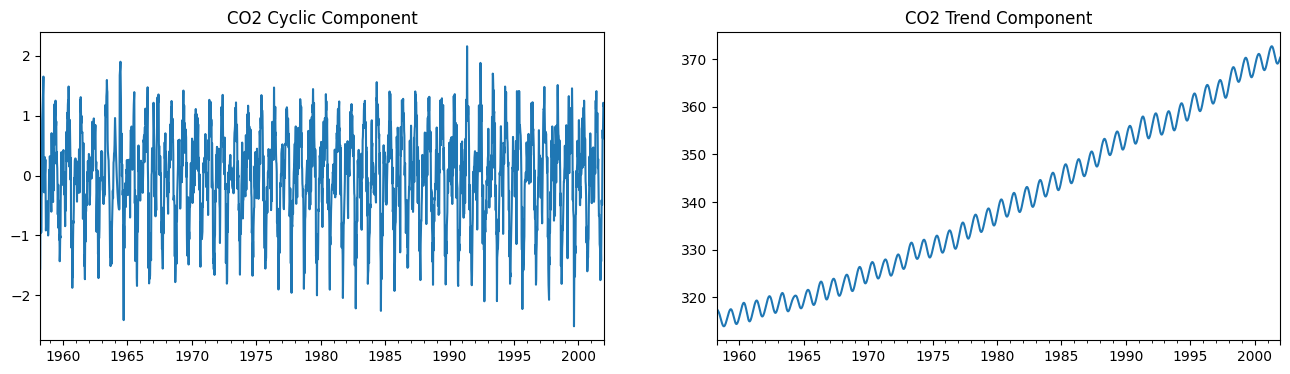

In [66]:
fig, ax = plt.subplots(1,2, figsize=(16, 4))
co2_cyclic.plot(ax=ax[0], title='CO2 Cyclic Component')
co2_trend.plot(ax=ax[1], title='CO2 Trend Component');

In [67]:
((co2_cyclic + co2_trend) == co2_df['co2']).sum()

2284

In [68]:
co2_df.shape

(2284, 1)

# Recipe 4. Detecting Time Series Stationarity 

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.datasets import co2

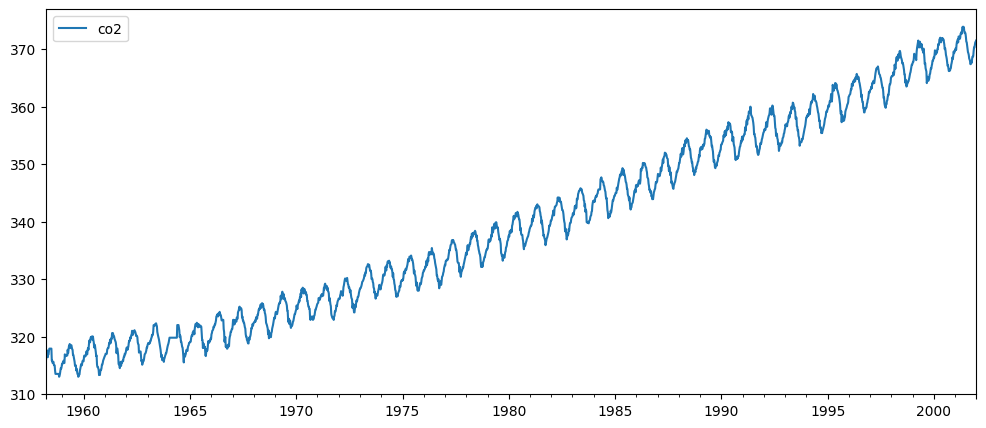

In [71]:
co2_df.plot();

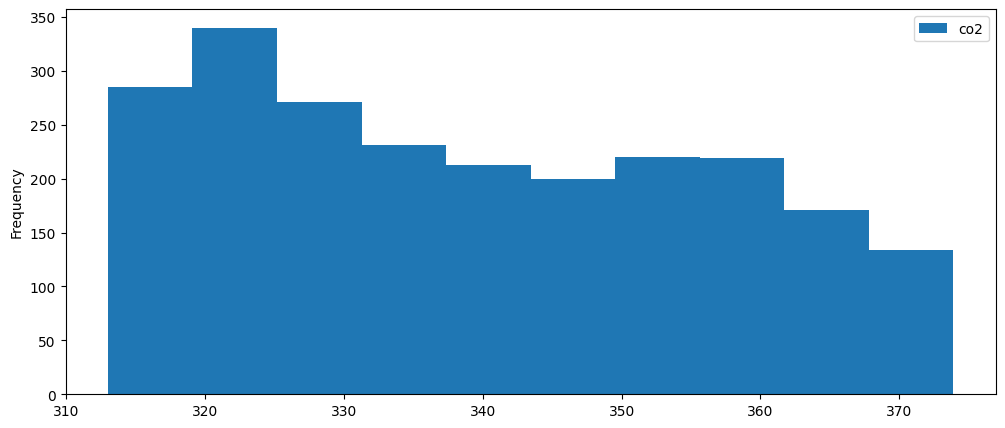

In [72]:
co2_df.plot(kind='hist');

In [73]:
co2_df.shape

(2284, 1)

In [74]:
# n = co2_df.shape[0]
# lags = int(12*(n/100)**(0.25))

In [75]:
# Function to print stationarity test results
def print_results(output, test='adf'):
    
    pval = output[1]        # Extract the p-value
    test_score = output[0]  # Extract the test statistic
    lags = output[2]        # Extract the number of lags used
    
    decision = 'Non-Stationary'      # Default assumption is non-stationary
    if test == 'adf':                # Augmented Dickey-Fuller test case
        critical = output[4]         # Extract critical values
        if pval < 0.05:              # Check if p-value is below 5% significance level
            decision = 'Stationary'  # Reject null hypothesis
    elif test == 'kpss':             # KPSS test case
        critical = output[3]         # Extract critical values
        if pval >= 0.05:             # Check if p-value is above 5% significance level
            decision = 'Stationary'  # Fail to reject null hypothesis
            
    # Store results in a dictionary
    output_dict = {
        'Test Statistic': test_score,  # Store test statistic
        'p-value': pval,               # Store p-value
        'Numbers of lags': lags,       # Store number of lags used
        'decision': decision           # Store stationarity decision
    }
    
    # Add critical values to the dictionary
    for key, value in critical.items():
        output_dict[f"Critical Value ({key})"] = value
    
    return pd.Series(output_dict, name=test)  # Return results as a Pandas Series

In [76]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

In [77]:
adf_output = adfuller(co2_df)
kpss_output = kpss(co2_df)

In [78]:
pd.concat([
print_results(adf_output, 'adf'),
print_results(kpss_output, 'kpss')
], axis=1)

,adf,kpss
Test Statistic,0.046051,7.649196
p-value,0.962179,0.01
Numbers of lags,27,29
decision,Non-Stationary,Non-Stationary
Critical Value (1%),-3.433252,0.739
Critical Value (5%),-2.862822,0.463
Critical Value (10%),-2.567452,0.347
Critical Value (2.5%),NaN,0.574


In [79]:
# Function to check stationarity using KPSS and ADF tests
def check_stationarity(df):
    kps = kpss(df)                                # Perform KPSS test
    adf = adfuller(df)                            # Perform Augmented Dickey-Fuller (ADF) test
    
    kpss_pv, adf_pv = kps[1], adf[1]              # Extract p-values from both tests
    kpssh, adfh = 'Stationary', 'Non-stationary'  # Default assumptions
    
    if adf_pv < 0.05:    # Reject ADF Null Hypothesis (data is stationary)
        
        adfh = 'Stationary'
    if kpss_pv < 0.05:   # Reject KPSS Null Hypothesis (data is non-stationary)
        
        kpssh = 'Non Stationary'
    
    return (kpssh, adfh)  # Return stationarity results from both tests

In [80]:
# Function to plot comparisons of multiple time series methods with stationarity checks
def plot_comparison(methods, plot_type='line'):
    
    n = len(methods) // 2                                        # Determine number of rows for subplots
    fig, ax = plt.subplots(n, 2, sharex=True, figsize=(20, 10))  # Create subplots
    
    for i, method in enumerate(methods):
        method.dropna(inplace=True)                              # Remove NaN values to avoid plotting issues
        name = [n for n in globals() if globals()[n] is method]  # Retrieve method name dynamically
        v, r = i // 2, i % 2                                     # Determine subplot position (row, column)

        kpss_s, adf_s = check_stationarity(method)               # Perform stationarity tests

        # Plot the method using specified plot type
        method.plot(kind=plot_type, 
                    ax=ax[v, r], 
                    legend=False, 
                    title=f'{name[0].upper()} KPSS={kpss_s}, ADF={adf_s}')
        
        ax[v, r].title.set_size(14)  # Set title font size

        # Plot rolling mean (52-week moving average) for trend visualization
        method.rolling(52).mean().plot(ax=ax[v, r], legend=False)

In [81]:
# using first order differencing (detrending)
first_ord_diff = co2_df.diff().dropna()

# using second order differencing
second_ord_diff = co2_df.diff().diff().dropna()

# differencing to remove seasonality
diseasonalize = co2_df.diff(52).dropna()

# using rolling mean 
rolling_mean = co2_df.rolling(window=52).mean()
subt_roll_mean = co2_df - rolling_mean

# log transform
log_transform = np.log(co2_df)

# Square root transform
square_root = np.sqrt(co2_df)

# using seasonal_decompose to remove trend
decomp = seasonal_decompose(co2_df)
sd_detrend = (decomp.observed - decomp.trend)

# using hp_filter 
cyclic_extract, trend = hpfilter(co2_df)

# combine the methods into a list
methods = [first_ord_diff, second_ord_diff, 
           diseasonalize, subt_roll_mean, 
           log_transform, square_root,
           sd_detrend, cyclic_extract]

In [82]:
###### configurations for image quality#######
plt.rcParams["figure.figsize"] = [12, 5]   ##
# plt.rcParams['figure.dpi'] = 300           ## 300 for printing
# plt.rc('font', size=8)                     ## 
# plt.rc('axes', titlesize=10)               ## 
# plt.rc('axes', labelsize=12)               ##
# plt.rc('xtick', labelsize=10)              ##
# plt.rc('ytick', labelsize=10)              ##
# plt.rc('legend', fontsize=10)              ##
# plt.rc('figure', titlesize=10)             ## 
#############################################

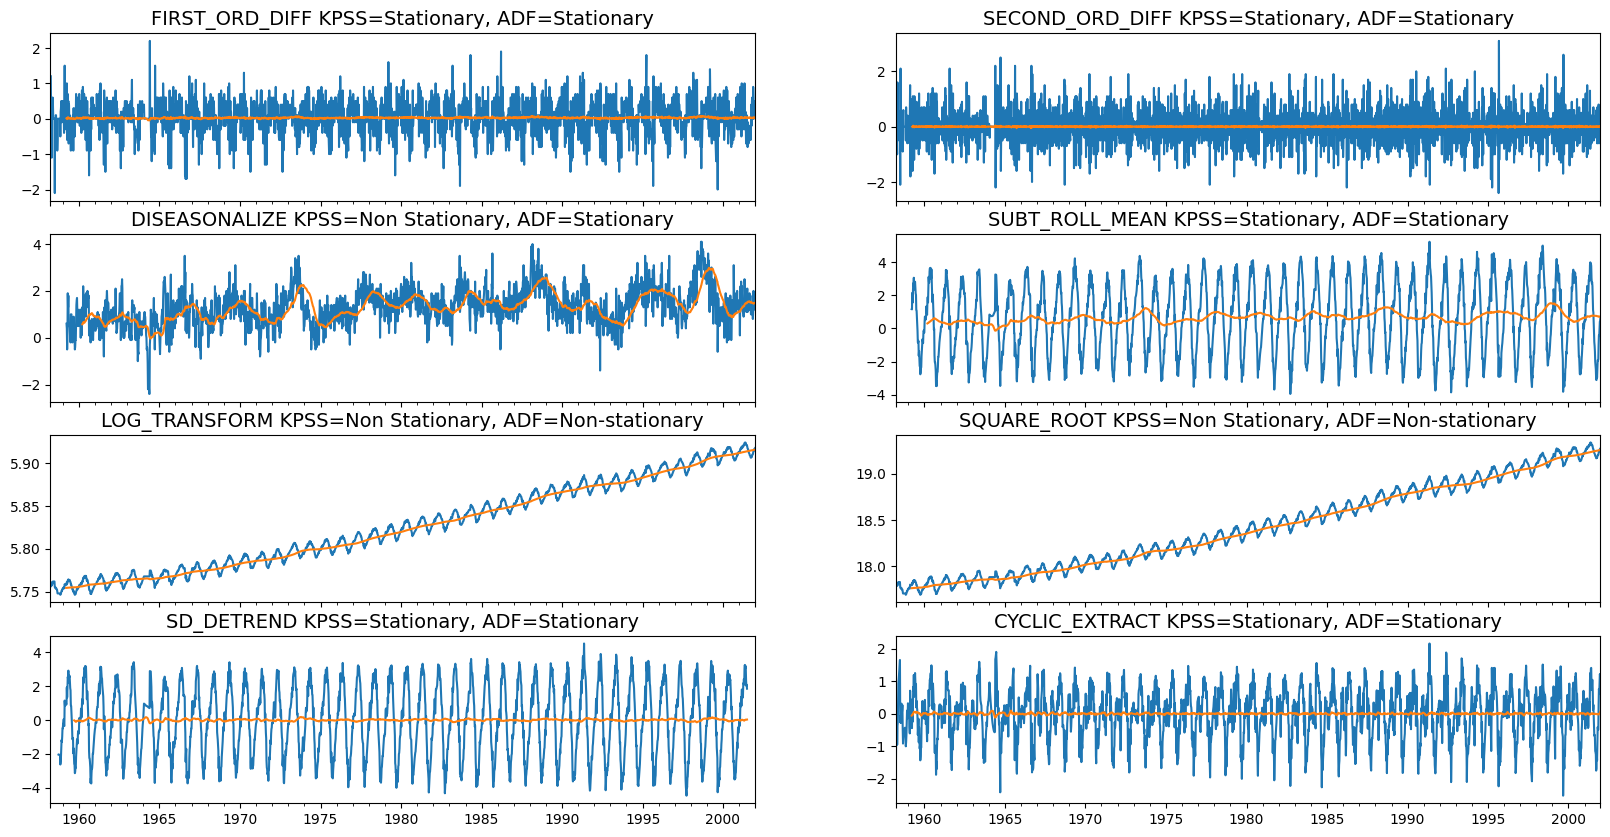

In [83]:
plot = plot_comparison(methods)
warnings.simplefilter(action='ignore')

### There is more

In [85]:
adf_result = adfuller(first_ord_diff, store=True)
adf_result

(-15.517472045988978,
 2.3063609140308017e-28,
 {'1%': -3.4332532193008443,
  '5%': -2.862822565622804,
  '10%': -2.5674527697012306},
 <statsmodels.stats.diagnostic.ResultsStore at 0x2d05d5ee450>)

In [86]:
adf_result[3]

In [87]:
adf_result[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     112.4
Date:                Thu, 20 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:35:09   Log-Likelihood:                -1300.1
No. Observations:                2255   AIC:                             2658.
Df Residuals:                    2226   BIC:                             2824.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.2089      0.078    -15.517      0.000      -1.362      -1.056
x2             0.0694      0.074      0.934      0.351      -0.076       0.215
x3             0.0549      0.071      0.771      0.441      -0.085       0.194
x4             0.2661      0.068      3.894      0.000       0.132       0.400
x5             0.4363      0.066      6.603      0.000       0.307       0.566
x6             0.6273      0.064      9.780      0.000       0.502       0.753
x7             0.7159      0.063     11.377      0.000       0.592       0.839
x8             0.8211      0.062     13.246      0.000       0.699       0.943
x9             0.8455      0.061     13.779      0.000       0.725       0.966
x10            0.8269      0.061     13.641      0.000       0.708       0.946
x11            0.7763      0.060     13.011      0.000       0.659       0.893
x12            0.6904      0.058     11.815      0.000       0.576       0.805
x13            0.5949      0.057     10.486      0.000       0.484       0.706
x14            0.4798      0.055      8.736      0.000       0.372       0.588
x15            0.3971      0.053      7.466      0.000       0.293       0.501
x16            0.3136      0.052      6.074      0.000       0.212       0.415
x17            0.2572      0.050      5.096      0.000       0.158       0.356
x18            0.2521      0.050      5.082      0.000       0.155       0.349
x19            0.2443      0.049      4.982      0.000       0.148       0.341
x20            0.2534      0.049      5.211      0.000       0.158       0.349
x21            0.2867      0.048      5.940      0.000       0.192       0.381
x22            0.3286      0.048      6.864      0.000       0.235       0.422
x23            0.3501      0.047      7.426      0.000       0.258       0.443
x24            0.3452      0.046      7.504      0.000       0.255       0.435
x25            0.3440      0.044      7.904      0.000       0.259       0.429
x26            0.2724      0.039      6.924      0.000       0.195       0.350
x27            0.1844      0.032      5.846      0.000       0.123       0.246
x28            0.0940      0.021      4.493      0.000       0.053       0.135
const          0.0299      0.009      3.201      0.001       0.012       0.048
==============================================================================
Omnibus:                       57.058   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.961
Skew:                           0.023   Prob(JB):                     2.21e-29
Kurtosis:                       4.184   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [88]:
adf_result = adfuller(co2_df ,store=True)
adf_result[-1].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     24.42
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          1.63e-108
Time:                        11:35:09   Log-Likelihood:                -1310.4
No. Observations:                2256   AIC:                             2679.
Df Residuals:                    2227   BIC:                             2845.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.512e-05      0.001      0.046      0.963      -0.001       0.001
x2            -0.1320      0.021     -6.248      0.000      -0.173      -0.091
x3            -0.0062      0.021     -0.294      0.769      -0.048       0.035
x4             0.2200      0.021     10.403      0.000       0.178       0.261
x5             0.1717      0.022      7.932      0.000       0.129       0.214
x6             0.1930      0.022      8.799      0.000       0.150       0.236
x7             0.0872      0.022      3.911      0.000       0.044       0.131
x8             0.1022      0.022      4.569      0.000       0.058       0.146
x9             0.0212      0.022      0.944      0.345      -0.023       0.065
x10           -0.0200      0.022     -0.891      0.373      -0.064       0.024
x11           -0.0504      0.022     -2.244      0.025      -0.094      -0.006
x12           -0.0858      0.022     -3.816      0.000      -0.130      -0.042
x13           -0.0909      0.023     -4.034      0.000      -0.135      -0.047
x14           -0.1077      0.023     -4.774      0.000      -0.152      -0.063
x15           -0.0753      0.022     -3.350      0.001      -0.119      -0.031
x16           -0.0725      0.022     -3.238      0.001      -0.116      -0.029
x17           -0.0481      0.022     -2.149      0.032      -0.092      -0.004
x18            0.0024      0.022      0.109      0.913      -0.041       0.046
x19           -0.0042      0.022     -0.187      0.852      -0.048       0.040
x20            0.0103      0.022      0.461      0.645      -0.033       0.054
x21            0.0307      0.022      1.378      0.168      -0.013       0.074
x22            0.0327      0.022      1.474      0.140      -0.011       0.076
x23            0.0134      0.022      0.604      0.546      -0.030       0.057
x24           -0.0227      0.022     -1.042      0.298      -0.065       0.020
x25           -0.0169      0.021     -0.789      0.430      -0.059       0.025
x26           -0.0914      0.021     -4.354      0.000      -0.133      -0.050
x27           -0.0875      0.021     -4.154      0.000      -0.129      -0.046
x28           -0.0781      0.021     -3.726      0.000      -0.119      -0.037
const          0.0187      0.185      0.101      0.919      -0.345       0.382
==============================================================================
Omnibus:                       56.964   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.100
Skew:                           0.046   Prob(JB):                     5.61e-29
Kurtosis:                       4.173   Cond. No.                     6.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

# Recipe 5. Applying Power Transformations to Time Series Data

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox
from statsmodels.stats.api import (het_breuschpagan, 
                                   het_goldfeldquandt, 
                                   het_white, jarque_bera,
                                   omni_normtest, normal_ad)
from statsmodels.stats.diagnostic import kstest_normal, normal_ad
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
from statsmodels.tools.tools import add_constant

In [91]:
# plt.rcParams["figure.figsize"] = (20,8)

### Testing for Normality

In [93]:
from scipy.stats import shapiro, kstest, normaltest
from statsmodels.stats.diagnostic import kstest_normal, normal_ad

In [94]:
# Function to determine normality based on statistical test results
def is_normal(test, p_level=0.05):
    
    stat, pval = test                                    # Extract test statistic and p-value
    
    return 'Normal' if pval > p_level else 'Not Normal'  # Determine normality based on p-value threshold

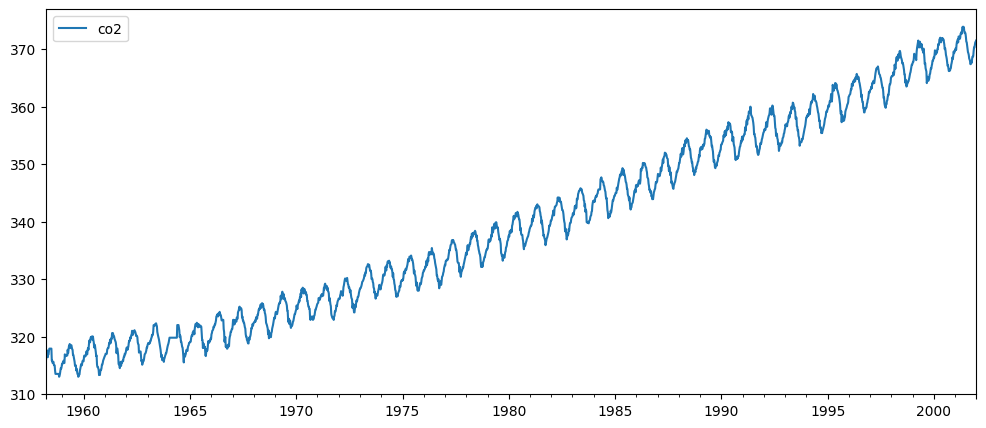

In [95]:
co2_df.plot();

In [96]:
# Ensure co2_df is treated as a 1D array
co2_values = co2_df.values.flatten()

# Compute normal arguments using mean and standard deviation
normal_args = (np.mean(co2_values), np.std(co2_values))

# Apply normality tests
print(is_normal(shapiro(co2_values)))  
print(is_normal(normaltest(co2_values)))  
print(is_normal(normal_ad(co2_values)))  
print(is_normal(kstest_normal(co2_values)))  
print(is_normal(kstest(co2_values, cdf='norm', args=normal_args)))  

Not Normal
Not Normal
Not Normal
Not Normal
Not Normal


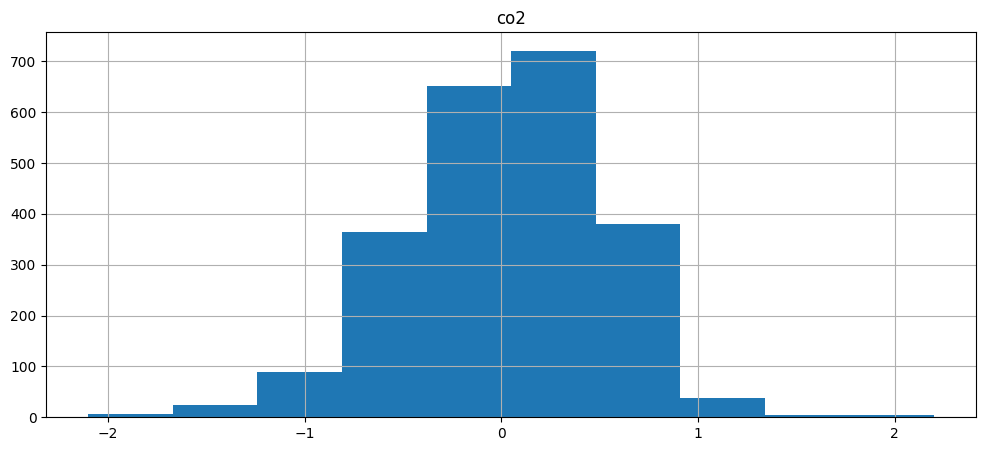

In [97]:
co2_df.diff().hist();

In [98]:
# from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.ar_model import AutoReg

# Fit an AutoRegressive (AR) model with lag=1 and no trend component
model = AutoReg(co2_df.dropna(), lags=1, trend='n').fit()

# Display Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    co2   No. Observations:                 2284
Model:                     AutoReg(1)   Log Likelihood               -1637.977
Method:               Conditional MLE   S.D. of innovations              0.496
Date:                Thu, 20 Mar 2025   AIC                           3279.954
Time:                        11:35:10   BIC                           3291.420
Sample:                    04-05-1958   HQIC                          3284.136
                         - 12-29-2001                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
co2.L1         1.0001   3.05e-05   3.28e+04      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9999           +0.0000j            0.9999            0.0000
-----------------------------------------------------------------------------
"""

In [99]:
print(is_normal(shapiro(model.resid)))
print(is_normal(normaltest(model.resid)))
print(is_normal(normal_ad(model.resid)))
print(is_normal(kstest_normal(model.resid)))
print(is_normal(kstest(model.resid, 
                   cdf='norm', 
                   args=(np.mean(model.resid), np.std(model.resid)))))

Not Normal
Not Normal
Not Normal
Not Normal
Not Normal


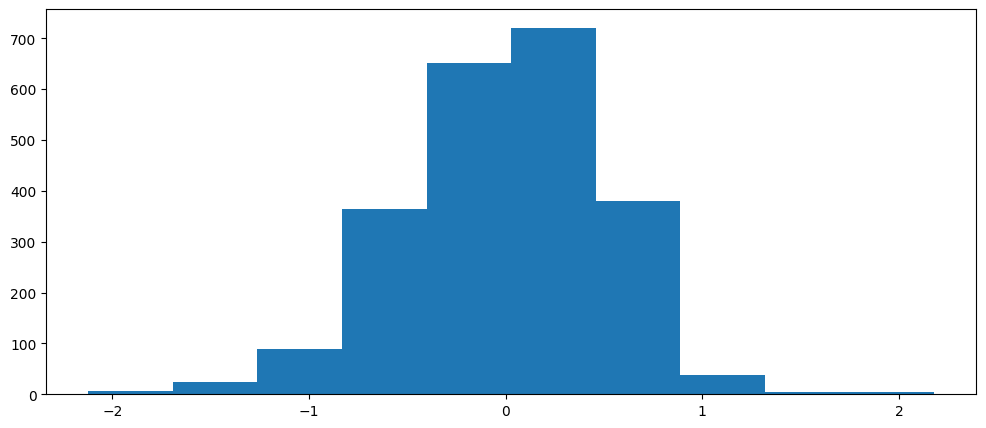

In [100]:
plt.hist(model.resid);

In [101]:
model.resid.mean()

0.00012627220508227264

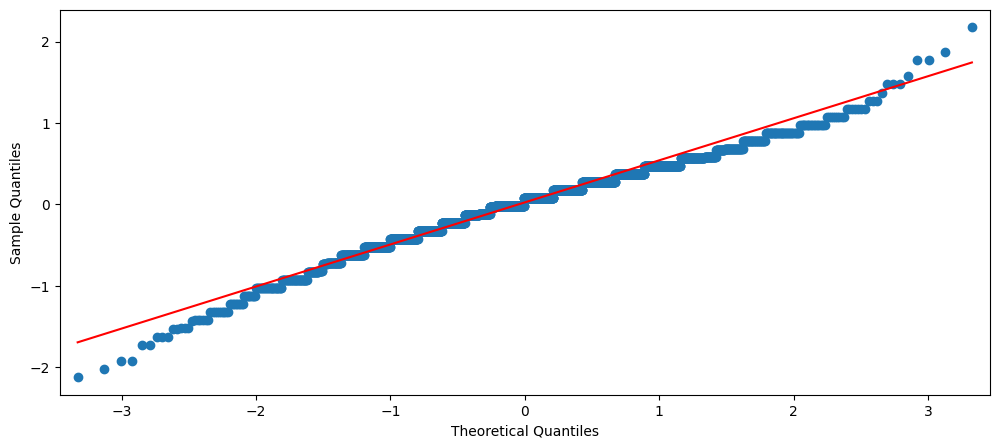

In [102]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model.resid, line='q');

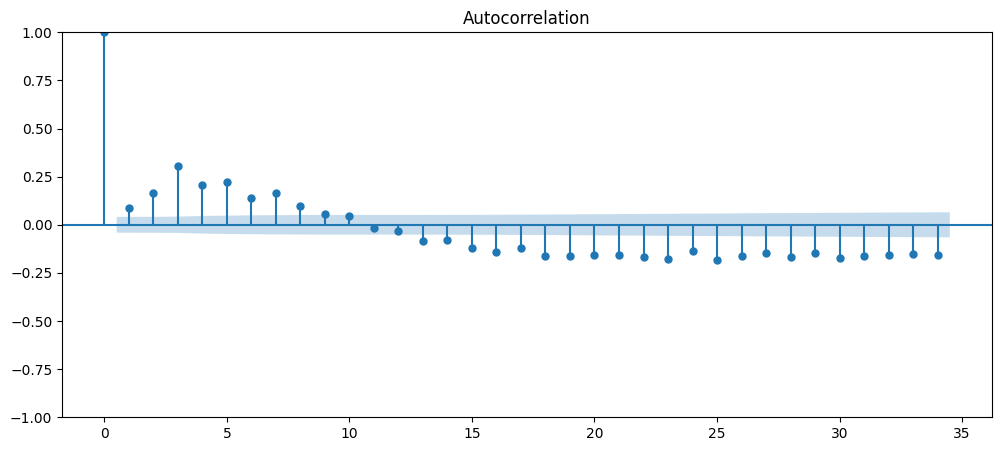

In [103]:
plot_acf(model.resid);plt.show()

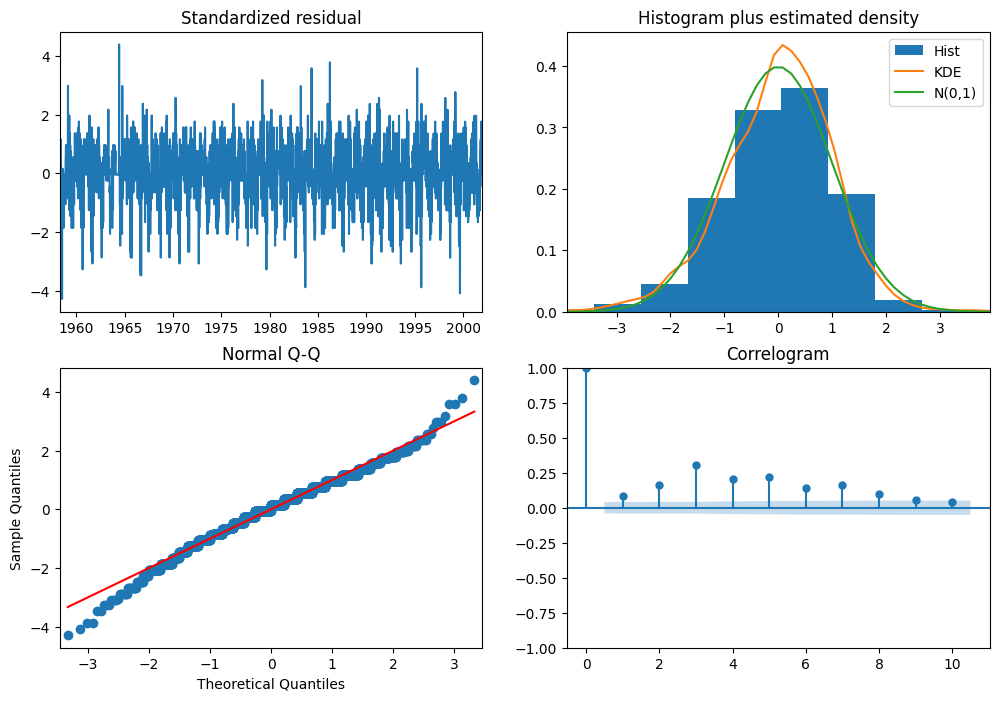

In [104]:
# Generate diagnostic plots for the fitted AutoReg model
model.plot_diagnostics(figsize=(12, 8))
plt.show() 

In [105]:
# Perform a normality test on the residuals of the model
normality_test = model.test_normality()  

# Display the test results
normality_test

Jarque-Bera    1.194972e+02
P-value        1.125935e-26
Skewness      -3.395637e-01
Kurtosis       3.891627e+00
dtype: float64

**Jarque-Bera (JB) statistic:** 1.194972e+02 (≈ 119.5)

    This is the test statistic. Higher values indicate a stronger deviation from normality.

**P-value:** 1.125935e-26 (≈ 0.0000000000000000000000000113)

    A very small p-value suggests that the null hypothesis (which assumes normality) is rejected.
    This means the residuals are not normally distributed.

**Skewness:** -3.395637e-01 (≈ -0.34)

    Skewness measures asymmetry in the data.
    A value close to 0 suggests symmetry.
    Negative skewness means the distribution has a longer left tail (more values on the right).
    Since -0.34 is relatively small, it suggests a slight left skew.
    
**Kurtosis:** 3.891627e+00 (≈ 3.89)

    Kurtosis measures whether the distribution is peaked or flat.
    A normal distribution has a kurtosis of 3.
    Higher than 3 (leptokurtic) means the distribution has fatter tails (more extreme values).
    Since 3.89 is above 3, it suggests the presence of more extreme values than a normal distribution.

In [107]:
# Perform a test for heteroskedasticity (variance inconsistency in residuals)
heteroskedasticity_test = model.test_heteroskedasticity()  

# Display the test results
heteroskedasticity_test

,ARCH-LM,P-value,DF
Lag,,,
1,0.590650,0.442168,1
2,2.754957,0.252214,2
3,27.651645,0.000004,3
4,26.480304,0.000025,4
5,30.254785,0.000013,5
6,30.505528,0.000031,6
7,30.480297,0.000078,7
8,30.775329,0.000154,8
9,30.865914,0.000312,9


    If p-value < 0.05, we reject the null hypothesis and conclude that heteroskedasticity is present.
    If p-value > 0.05, we fail to reject the null hypothesis, meaning no significant heteroskedasticity is detected.

For lag 1 and 2: No significant heteroskedasticity at these lags, the variance of the errors is not constant over time.

### Testing Homoskedactiticy

In [110]:
from statsmodels.stats.api import (het_breuschpagan, 
                                   het_white)

In [111]:
model.resid

1958-04-05    1.177533
1958-04-12    0.277447
1958-04-19   -0.122574
1958-04-26   -1.122567
1958-05-03    0.477511
                ...   
2001-12-01   -0.026320
2001-12-08    0.473680
2001-12-15    0.373645
2001-12-22    0.073616
2001-12-29    0.173609
Freq: W-SAT, Length: 2283, dtype: float64

In [112]:
model.fittedvalues.shape  # Get the shape (dimensions) of the fitted values from the model

(2283,)

In [113]:
model.resid.shape         # Get the shape (dimensions) of the residuals (errors) from the model

(2283,)

In [114]:
model.fittedvalues

1958-04-05    316.122467
1958-04-12    317.322553
1958-04-19    317.622574
1958-04-26    317.522567
1958-05-03    316.422489
                 ...    
2001-12-01    370.326320
2001-12-08    370.326320
2001-12-15    370.826355
2001-12-22    371.226384
2001-12-29    371.326391
Freq: W-SAT, Length: 2283, dtype: float64

In [115]:
def het_test(model, test=het_breuschpagan):  
    
    # Perform the Breusch-Pagan heteroskedasticity test
    lm, lm_pvalue, fvalue, f_pvalue = (
        het_breuschpagan(model.resid,        # Use residuals from the model
                         add_constant(       # Add constant term to fitted values
                             model.fittedvalues)
                        ))

    # Return interpretation based on p-value threshold
    return "Heteroskedastic" if f_pvalue < 0.05 else "Homoskedastic"

The Breusch-Pagan test checks for heteroskedasticity, which means whether the variance of errors (residuals) in a regression model is constant (homoskedasticity) or changing (heteroskedasticity).

* If the p-value is low (< 0.05) → Heteroskedasticity detected (errors have non-constant variance).
* If the p-value is high (≥ 0.05) → Homoskedasticity assumed (errors have constant variance).
  
Heteroskedasticity can indicate that the model is not capturing some patterns in the data properly.

In [117]:
het_test(model, test=het_breuschpagan)

'Homoskedastic'

In [118]:
het_test(model, test=het_white)

'Homoskedastic'

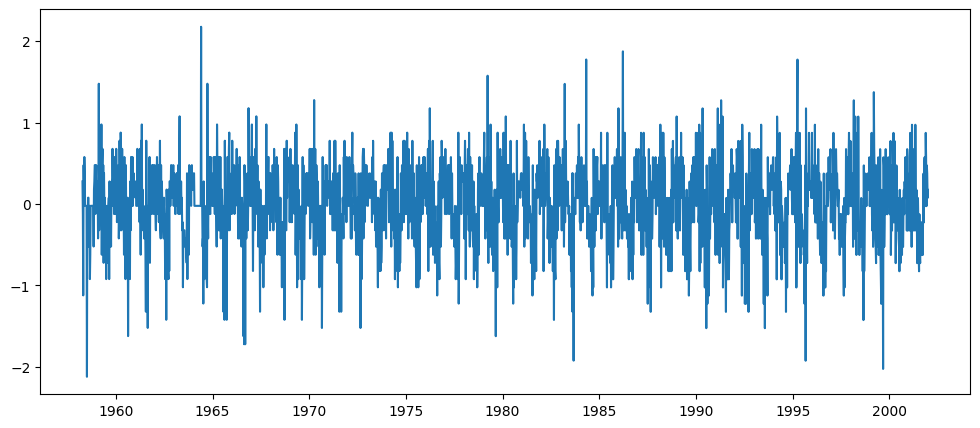

In [119]:
# Plot Residuals
plt.plot(model.resid[1:]);

### **Box-Cox Transformation**
The **Box-Cox transformation** is a **power transformation** used to make **non-normal** data more **normal-like**, improving the assumptions of **linearity, normality, and homoscedasticity** in regression models.

### **Formula:**
$$
y' =
\begin{cases} 
\frac{y^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
\ln(y), & \text{if } \lambda = 0
\end{cases}
$$

where:
- $ y' $ is the transformed data,
- $ y $ is the original data,
- $ \lambda $ is the transformation parameter.

### **Key Properties:**
- $ \lambda = 2 $ → **Squared transformation**
- $ \lambda = 1 $ → **No transformation**
- $ \lambda = 0 $ → **Log transformation** ($ \ln y $)
- $ \lambda = -1 $ → **Inverse transformation** ($ 1/y $)

### **Why Use Box-Cox?**
1. **Stabilizes variance** (reduces heteroskedasticity).
2. **Makes data more normally distributed** (for better statistical modeling).
3. **Improves linearity** (helps meet regression assumptions).

**⚠️ Important:**  
- The Box-Cox transformation **only works for positive values** ($ y > 0 $).  
- If data contains **zeros or negatives**, a **shift** may be required before applying the transformation.


In [121]:
from scipy.stats import boxcox

In [122]:
airp_df

,value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [123]:
# Apply the Box-Cox transformation to stabilize variance
xt, lmbda = boxcox(airp_df['value'])  # xt: Transformed data; lmbda: Optimal lambda parameter found for transformation

In [124]:
# Convert the transformed data into a pandas Series (same index as the original DataFrame)
xts = pd.Series(xt, index=airp_df.index)  

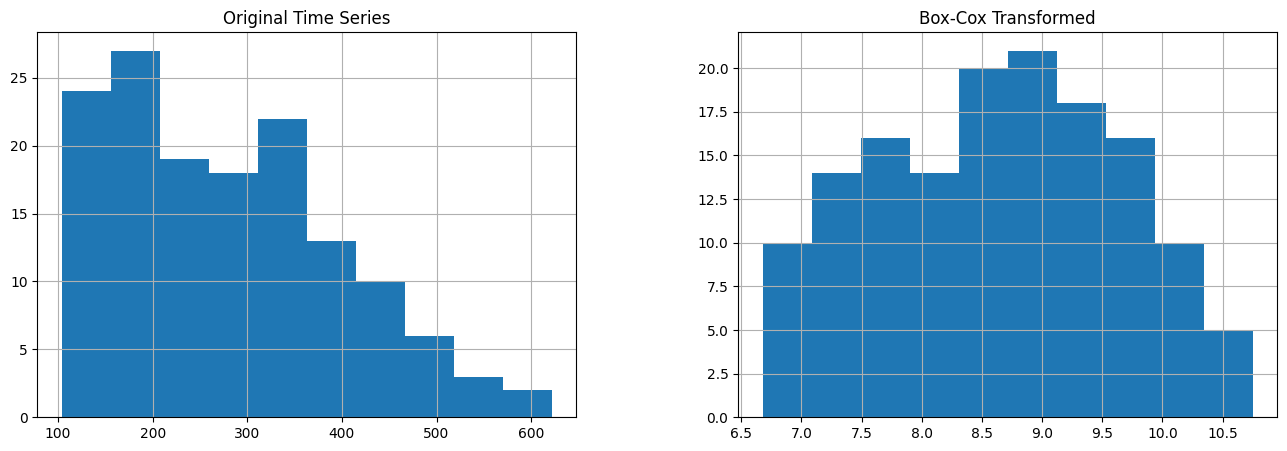

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
airp_df.hist(ax=ax[0])
ax[0].set_title('Original Time Series')
xts.hist(ax=ax[1])
ax[1].set_title('Box-Cox Transformed');

# plt.savefig('images/fig_9.23.png', bbox_inches='tight')

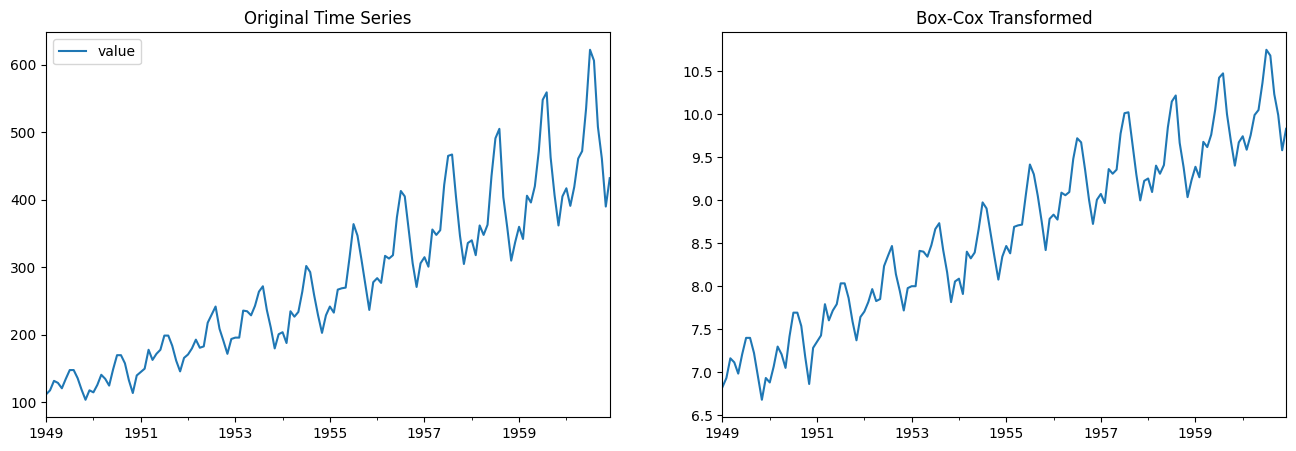

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
airp_df.plot(ax=ax[0])
ax[0].set_title('Original Time Series')
xts.plot(ax=ax[1])
ax[1].set_title('Box-Cox Transformed'); 

#plt.savefig('images/fig_9.24.png', bbox_inches='tight')

In [127]:
# Fit an AutoRegressive (AR) model with lag 1 and no trend on the original dataset
model_airp = AutoReg(airp_df, lags=1, trend='n').fit()  

# Fit an AutoRegressive (AR) model with lag 1 and no trend on the Box-Cox transformed dataset
model_bx = AutoReg(xts, lags=1, trend='n').fit()  

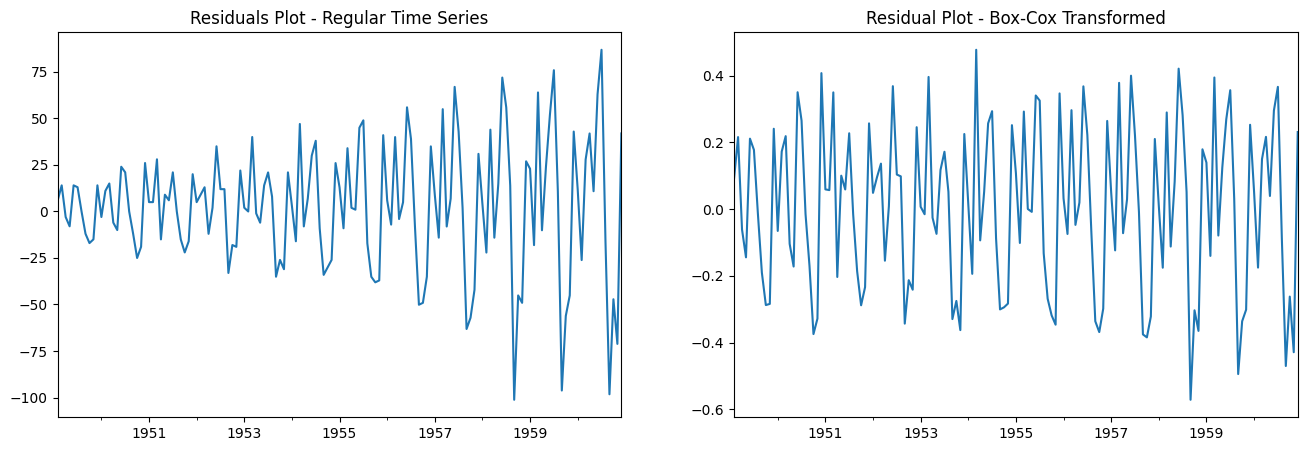

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
model_airp.resid.plot(ax=ax[0])
ax[0].set_title('Residuals Plot - Regular Time Series')
model_bx.resid.plot(ax=ax[1])
ax[1].set_title('Residual Plot - Box-Cox Transformed');

#plt.savefig('images/fig_9.25.png', bbox_inches='tight')

### Diagnosis

In [130]:
print(model_bx.diagnostic_summary())

             Test of Normality              
Jarque-Bera    P-value   Skewness   Kurtosis
--------------------------------------------
      5.987      0.050     -0.128      2.031


    Test of Conditional Homoskedasticity   
       Lag    ARCH-LM    P-value         DF
-------------------------------------------
         1      0.116      0.733          1
         2      1.243      0.537          2
         3      4.112      0.250          3
         4      4.058      0.398          4
         5      6.836      0.233          5
         6      7.203      0.302          6
         7     14.755      0.039          7
         8     15.157      0.056          8
         9     15.993      0.067          9
        10     17.963      0.056         10
-------------------------------------------


In [131]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print(f"\n{'Test of No Serial Correlation':^40}")
print("="*40)

# Perform Ljung-Box test for serial correlation in residuals
lb_test = acorr_ljungbox(model_bx.resid, lags=[1,2,3,4,5,6,7,8,9], return_df=True)
print(lb_test)


     Test of No Serial Correlation      
     lb_stat     lb_pvalue
1   6.891379  8.661245e-03
2   8.799865  1.227817e-02
3  12.728606  5.261829e-03
4  28.039695  1.224399e-05
5  29.201881  2.116595e-05
6  29.204901  5.563811e-05
7  31.021143  6.161812e-05
8  47.991784  9.915323e-08
9  50.468158  8.794752e-08


In [132]:
from statsmodels.stats.stattools import jarque_bera

# Perform Jarque-Bera test
jb_test = jarque_bera(model_bx.resid)

# Print results in a structured format
print(f"\n{'Test of Normality':^40}")
print("="*40)
print(f"{'Jarque-Bera':<15}{'P-value':<10}{'Skewness':<10}{'Kurtosis'}")
print("-"*40)
print(f"{jb_test[0]:<15.3f}{jb_test[1]:<10.3f}{jb_test[2]:<10.3f}{jb_test[3]:.3f}")


           Test of Normality            
Jarque-Bera    P-value   Skewness  Kurtosis
----------------------------------------
5.987          0.050     -0.128    2.031


In [133]:
from statsmodels.stats.diagnostic import het_arch

print(f"\n{'Test of Conditional Homoskedasticity':^40}")
print("="*40)

# Perform ARCH-LM test for conditional homoskedasticity
for lag in range(1, 11):
    arch_test = het_arch(model_bx.resid, maxlag=lag)
    print(f"   {lag:<10}{arch_test[0]:<10.3f}{arch_test[1]:<10.3f}{lag}")


  Test of Conditional Homoskedasticity  
   1         0.116     0.733     1
   2         1.243     0.537     2
   3         4.112     0.250     3
   4         4.058     0.398     4
   5         6.836     0.233     5
   6         7.203     0.302     6
   7         14.755    0.039     7
   8         15.157    0.056     8
   9         15.993    0.067     9
   10        17.963    0.056     10


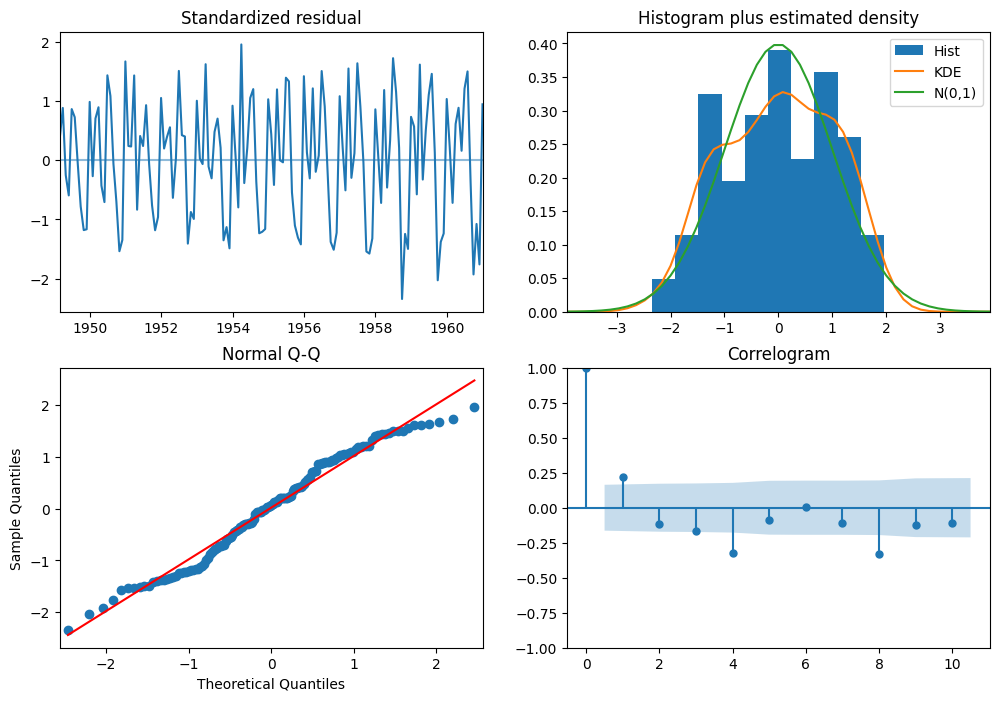

In [134]:
# Generate diagnostic plots for the fitted AutoReg model on the Box-Cox transformed dataset
model_bx.plot_diagnostics(figsize=(12, 8))
plt.show() 


# Recipe 6. Testing for Autocorrelation

In [136]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [137]:
# Compute the first-order difference and drop NaN values
co2_diff = co2_df.diff().dropna()  

In [138]:
# Perform the Ljung-Box test for autocorrelation up to 10 lags
acorr_ljungbox(co2_diff, lags=10, return_df=True)  

,lb_stat,lb_pvalue
1,16.465996,4.953050e-05
2,79.094659,6.680563e-18
3,290.951900,9.035108e-63
4,390.520507,3.107289e-83
5,502.638658,2.151267e-106
6,546.194148,9.337537e-115
7,608.250032,4.072029e-127
8,630.709764,5.827742e-131
9,637.510409,1.851867e-131
10,641.806647,1.923859e-131


### There is more

In [140]:
# Perform the Ljung-Box test for autocorrelation on model residuals up to 10 lags
acorr_ljungbox(model_bx.resid, return_df=True, lags=10)  

,lb_stat,lb_pvalue
1,6.891379,8.661245e-03
2,8.799865,1.227817e-02
3,12.728606,5.261829e-03
4,28.039695,1.224399e-05
5,29.201881,2.116595e-05
6,29.204901,5.563811e-05
7,31.021143,6.161812e-05
8,47.991784,9.915323e-08
9,50.468158,8.794752e-08
10,52.247452,1.026842e-07


This shows that the test statistic for all lags up to lag 10 are significant (pvalue < 0.05), so you can reject the null hypothesis. Rejecting the null
hypothesis means you reject the claim that there is no autocorrelation.

In [142]:
# Apply the Ljung-Box test on the residuals, on 10 lags.
df_residuals = acorr_ljungbox(model_bx.resid, np.arange(1, 11, 1))

# Check if all values in 'lb_pvalue' are lower than 0.05
if (df_residuals['lb_pvalue'] > 0.05).all():
    print('All p-values > 0.05; H0: Residuals are independently distributed and uncorrelated.\n')
else:
    print('There are p-values < 0.05; Ha: Residuals are autocorrelated.\n')

# Show Residuals
df_residuals

There are p-values < 0.05; Ha: Residuals are autocorrelated.



,lb_stat,lb_pvalue
1,6.891379,8.661245e-03
2,8.799865,1.227817e-02
3,12.728606,5.261829e-03
4,28.039695,1.224399e-05
5,29.201881,2.116595e-05
6,29.204901,5.563811e-05
7,31.021143,6.161812e-05
8,47.991784,9.915323e-08
9,50.468158,8.794752e-08
10,52.247452,1.026842e-07
